In [133]:
import pandas as pd
import numpy as np
from scipy.stats import norm, wilcoxon, ttest_ind

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import weightstats as stests
import statsmodels.stats.power as smp
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('test_1.csv')
df2 = pd.read_csv('test_2.csv')
df3 = pd.read_csv('test_3.csv')

# Задание 1

В файле test_1 лежит результат теста. target - какая-то целевая метрика. Изучите результаты теста и сделайте вывод (проверяем гипотезу о равенстве средних). В качестве решения - ноутбук, в котором построено распределение параметра target в группах и проверены нужные критерии.

In [122]:
test1 = df1[df1.group == 'test'].target
control1 = df1[df1.group == 'control'].target

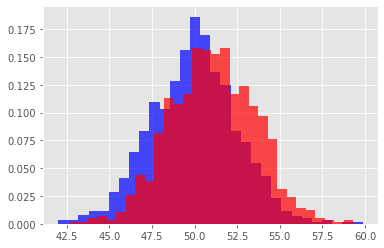

In [123]:
plt.hist(test1, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control1, bins=30, density=True, color='red', alpha=0.7)
plt.show()

Распределения похожи на нормальные. Можем применить Z-test для сравнения средних.

In [124]:
mu_test = test1.mean() 
mu_control = control1.mean()

In [125]:
mu_control

51.06737874869835

In [126]:
mu_test

49.958943954077576

In [134]:
res = stests.ztest(test1, control1, alternative='two-sided', value=mu_test-mu_control, ddof=1.0)
print("Z-statistic:", res[0])
print("P-value:", res[1])

Z-statistic: -1.2664664785523437e-13
P-value: 0.999999999999899


In [137]:
ttest_ind(mu_control,mu_test)

f:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
f:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
f:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
f:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
f:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=nan, pvalue=nan)

Гипотеза о равенстве средних верна, при alpha < 0.9999

# Задание 2

В файле test_2 лежит результат теста, который был нацелен на увеличение суммы чека клиента. Изучите результаты теста и сделайте вывод , увеличилась сумма чека или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

### Для сравнения доходности каждой группы воспользуемся U-критерием Манна-Уитни

In [82]:
df2

,group,client_id,avg_sum
0,test,1,156.686451
1,test,2,342.625859
2,test,3,79.712120
3,test,4,493.110807
4,test,5,124.135016
...,...,...,...
595,control,596,209.075972
596,control,597,57.990291
597,control,598,42.577037
598,control,599,178.320097


H0 - группы не отличаются.

H1 - группы отличаются.


In [83]:
test2 = df2[df2.group == 'test'].avg_sum
control2 = df2[df2.group == 'control'].avg_sum

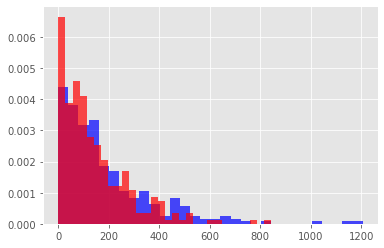

In [84]:
plt.hist(test2, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control2, bins=30, density=True, color='red', alpha=0.7)
plt.show()

In [85]:
wilcoxon(test2[:294],control2[:294])

WilcoxonResult(statistic=17831.0, pvalue=0.008292197629585338)

p-value = 0.008, если p-value < alplha, то принимаем альтернативную гипотизу - группы различаются.

# Задание 3

В файле test_3 лежит результат теста рассылки email, целевая метрика - конверсия в переход на сайт с этого email. Изучите результаты теста и сделайте вывод , увеличилась конверсия или нет. В качестве решения - ноутбук, в котором построено распределение параметра в группах и проверены нужные критерии.

### Две выборки распределены по Бернулли, будем использовать z-test

H0 - группы не отличаются.

H1 - группы отличаются.

In [86]:
df3

,group,client_id,click_flg
0,test,1,1
1,test,2,0
2,test,3,0
3,test,4,1
4,test,5,1
...,...,...,...
20028,control,20029,0
20029,control,20030,1
20030,control,20031,1
20031,control,20032,0


In [87]:
test3 = df3[df3.group == 'test'].click_flg
control3 = df3[df3.group == 'control'].click_flg

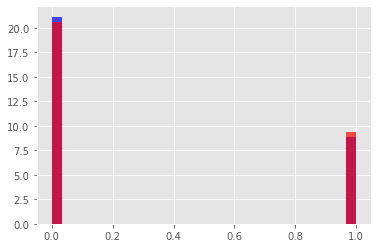

In [88]:
plt.hist(test3, bins=30, density=True, color='blue', alpha=0.7)
plt.hist(control3, bins=30, density=True, color='red', alpha=0.7)
plt.show()

In [89]:
stat, pval = proportions_ztest([sum(control3), sum(test3)], 
                                [len(control3), len(test3)]) 
print("test statistic =", stat)
print("p-value =", pval)

test statistic = 2.595183244634136
p-value = 0.009454050012441642


p-value = 0.009, если p-value < alplha, то принимаем альтернативную гипотизу - группы различаются.

# Задание 4

Покажите зависимость Мощности от Размера выборки двухвыборочного z-теста при размере эффекта (effect_size) 0.1, 0.5, 1 и при уровне значимости 0,05. Требуется предоставить ноутбук, который выводит 3 графика

In [178]:
power = [[],[],[]]
sample_sizes = [[],[],[]]
for j in enumerate([0.1,0.5,1]):
    for i in (range(50,2000)):
        power[j[0]].append(smp.tt_ind_solve_power(nobs1 = i, alpha = alpha, effect_size = j[1]))
        sample_sizes[j[0]].append(i)


Text(0, 0.5, 'Power')

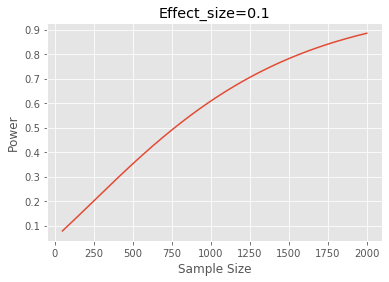

In [201]:
viz = sns.lineplot(x=sample_sizes[0], y=power[0])
viz.set_title('Effect_size=0.1')
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power")

Text(0, 0.5, 'Power')

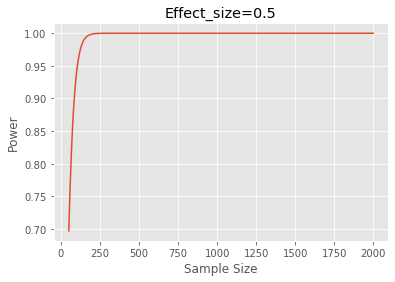

In [202]:
viz = sns.lineplot(x=sample_sizes[1], y=power[1])
viz.set_title('Effect_size=0.5')
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power")

Text(0, 0.5, 'Power')

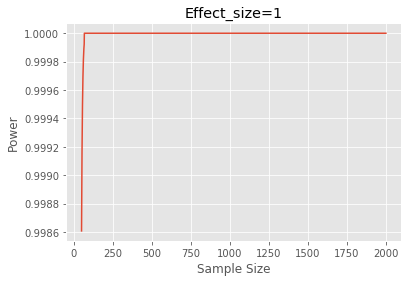

In [203]:
viz = sns.lineplot(x=sample_sizes[2], y=power[2])
viz.set_title('Effect_size=1')
viz.set_xlabel("Sample Size")
viz.set_ylabel("Power")